# Zadanie 3

## PBIL

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
d = 266 #fixed chromosome length

In [3]:
def init_prob_vec():
    p = np.zeros(d)
    for k in range(d):
        p[k] = 0.5
    return p

In [4]:
def binary_random(p):
    if np.random.rand() < p:
        z = 1
    else:
        z = 0
    return z

In [5]:
def random_individual(p):
    x = np.zeros(d, dtype=int)
    for k in range(d):
        x[k] = binary_random(p[k])
    return x

In [6]:
def random_population(p, N):
    population = np.zeros((N, d))
    for k in range (N):
        population[k] = random_individual(p)
    return population

In [7]:
def population_evaluation(population, F, N):
    evaluation = np.zeros(N)
    for k in range(N):
        evaluation[k] = F(population[k])
    return evaluation

In [8]:
def best_individual(population, evaluation):
    max_idx = np.argmax(evaluation)
    return (population[max_idx], evaluation[max_idx])

In [9]:
def pbil(N, T, theta1, theta2, theta3, F):
    t0 = time.time()
    
    results = []
    p = init_prob_vec()
    population = random_population(p, N)
    evaluation = population_evaluation(population, F, N)
    for t in range(T):
        x = best_individual(population, evaluation)[0]
        results.append(best_individual(population, evaluation)[1])
        for k in range(d):
            p[k] = p[k] * (1 - theta1) + x[k] * theta1
        for k in range(d):
            if np.random.rand() < theta2:
                p[k] = p[k] * (1 - theta3) + binary_random(0.5) * theta3
        population = random_population(p, N)
        evaluation = population_evaluation(population, F, N)
        
    print(time.time() - t0, best_individual(population, evaluation))
    return results

In [10]:
def show_plt(results, N, T, theta1, theta2, theta3):
    title = 'N = ' + str(N) + ', T = ' + str(T) + ', theta1 = ' + str(theta1) + ', theta2 = ' + str(theta2) + ', theta3 = ' + str(theta3)
    plt.figure()
    plt.plot(results)
    plt.title(title)
    plt.xlabel("iteration number")
    plt.ylabel("objective function value")
    plt.xlim((0, T-1))
    plt.show()

In [11]:
class_rules = []

with open('ClassificationRules.txt', 'r') as f:
    for line in f:
        class_rules.append([int(float(val)) for val in line.split()])

In [12]:
with open('ImageExpertReduced.txt', 'r') as f2:
    img_exp = f2.readline().split()

img_exp = [int(float(x)) for x in img_exp]

In [27]:
def objective_function(x):   
    rules = []
    res = np.zeros(3)
    img_res = [0] * 9350

    for i in range(d):      
        if x[i] == 1:
            rules.append(class_rules[i])

    for i in range(9350):
        for rule in rules:
            if rule[i] == 1:
                res[0] += 1
            elif rule[i] == 2:
                res[1] += 1
            else:
                res[2] += 1
        max_idx = np.argmax(res)
        img_res[i] = max_idx + 1
        res.fill(0)
        
    cnt = 0
    for x,y in zip(img_res, img_exp):
        if x == y:
            cnt += 1
            
    return cnt

In [35]:
results = pbil(50, 100, 0.1, 0.05, 0.01, objective_function)

4047.6816263198853 (array([1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
     

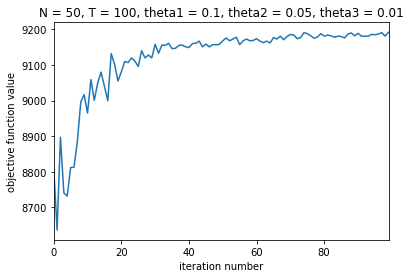

In [36]:
show_plt(results, 50, 100, 0.1, 0.05, 0.01)

In [37]:
results = pbil(50, 200, 0.1, 0.05, 0.01, objective_function)

7683.431247472763 (array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
      

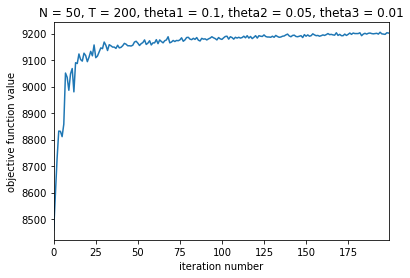

In [38]:
show_plt(results, 50, 200, 0.1, 0.05, 0.01)